Tasks:
- Prasoon:
    - [ ] Figure out the GPS Position variable (recommend converting GPS lat/lon to ECEF cartesian [link to module to do it]() and compare to `Position` variables).
    - [x] The time variable (convert to some sort of pythonic datetime object).
    - [ ] Background removal:
        - Savgol filter between PRN & GRACE satellite (1st or 2nd order & 60-120 second window).
        - Remove big time gaps.
    - [ ] Look thru ESA website and see if more satellites are available for the 2013-03-17 storm.

- Aaron:
    - [ ] Send (somehow) the Madrigal BG removal code.
    - [ ] Ask about Madrigal BG removal.
    - [ ] Find out about GRACE pierce point.
    - [ ] Pull time out of file name.
    
    
    

In [54]:
# Import necessary libraries
import cdflib
import xarray as xr
import os
# import urllib.request
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt

import cartopy.crs as ccrs

In [2]:
fname = ['GR_OPER_TEC1TMS_2F_20130316T000000_20130316T235959_0101.cdf', 'GR_OPER_TEC1TMS_2F_20130317T000000_20130317T235959_0101.cdf', 'GR_OPER_TEC1TMS_2F_20130318T000000_20130318T235959_0101.cdf', 'GR_OPER_TEC2TMS_2F_20130316T000000_20130316T235959_0101.cdf', 'GR_OPER_TEC2TMS_2F_20130317T000000_20130317T235959_0101.cdf', 'GR_OPER_TEC2TMS_2F_20130318T000000_20130318T235959_0101.cdf']

for f in fname[5:]:
    path = 'ESA_GRACE_data/' + f
    data = xr.Dataset()
    d = cdflib.CDF(path)

    print('Columns in Satellite Data', d.cdf_info().zVariables)

    step = range(len(d['Timestamp']))
    
    for var_name in d.cdf_info().zVariables:
        
        var_data = d[var_name]

        if var_name == 'DCB' or var_name == 'DCB_Error' :
            data[var_name] = d[var_name]
        
        elif type(var_data[0]) == np.ndarray:
            var_name1 = var_name + '_1'
            var_name2 = var_name + '_2'
            var_name3 = var_name + '_3'
            data[var_name1] = ('step', [i for i,j,k in var_data], {'step': step})
            data[var_name2] = ('step', [j for i,j,k in var_data], {'step': step})
            data[var_name3] = ('step', [k for i,j,k in var_data], {'step': step})

        else:
            data[var_name] = ('step', var_data, {'step': step})

print()
print(data)


Columns in Satellite Data ['Timestamp', 'Latitude', 'Longitude', 'Radius', 'GPS_Position', 'LEO_Position', 'PRN', 'L1', 'L2', 'P1', 'P2', 'S1_C_N0', 'S2_C_N0', 'Absolute_STEC', 'Absolute_VTEC', 'Elevation_Angle', 'Relative_STEC', 'Relative_STEC_RMS', 'DCB', 'DCB_Error']

<xarray.Dataset>
Dimensions:            (step: 56708)
Dimensions without coordinates: step
Data variables: (12/24)
    Timestamp          (step) float64 6.353e+13 6.353e+13 ... 6.353e+13
    Latitude           (step) float64 -60.57 -60.57 -60.57 ... 26.16 26.16 26.16
    Longitude          (step) float64 -175.0 -175.0 -175.0 ... 2.732 2.732 2.732
    Radius             (step) float64 6.825e+06 6.825e+06 ... 6.822e+06
    GPS_Position_1     (step) float64 -3.798e+06 -1.924e+07 ... 2.534e+07
    GPS_Position_2     (step) float64 -1.475e+07 1.345e+07 ... -7.897e+06
    ...                 ...
    Absolute_VTEC      (step) float64 11.79 7.872 11.45 ... 4.446 4.638 6.125
    Elevation_Angle    (step) float64 43.01 37.0 30.6

In [70]:
data.data_vars

Data variables:
    Timestamp          (step) float64 6.353e+13 6.353e+13 ... 6.353e+13
    Latitude           (step) float64 -60.57 -60.57 -60.57 ... 26.16 26.16 26.16
    Longitude          (step) float64 -175.0 -175.0 -175.0 ... 2.732 2.732 2.732
    Radius             (step) float64 6.825e+06 6.825e+06 ... 6.822e+06
    GPS_Position_1     (step) float64 -3.798e+06 -1.924e+07 ... 2.534e+07
    GPS_Position_2     (step) float64 -1.475e+07 1.345e+07 ... -7.897e+06
    GPS_Position_3     (step) float64 -2.178e+07 -1.3e+07 ... 3.192e+06
    LEO_Position_1     (step) float64 -3.341e+06 -3.341e+06 ... 6.117e+06
    LEO_Position_2     (step) float64 -2.906e+05 -2.906e+05 ... 2.918e+05
    LEO_Position_3     (step) float64 -5.944e+06 -5.944e+06 ... 3.008e+06
    PRN                (step) uint16 1 9 24 32 1 9 24 ... 31 18 21 25 29 30 31
    L1                 (step) float64 2.145e+07 2.21e+07 ... 2.06e+07 2.08e+07
    L2                 (step) float64 2.145e+07 2.21e+07 ... 2.06e+07 2.08e+07

In [ ]:
def bg_remove (arr (prn & satellie), order, window):
    
    
    [....]
    
    
    
    return fit




In [84]:
strftime('20130318T000000')

NameError: name 'strftime' is not defined

In [72]:
data.Timestamp[0]

<xarray.DataArray 'Timestamp' ()>
array(6.3530784e+13)
Attributes:
    step:     range(0, 56708)

In [73]:
d0 = pd.Timestamp('2013-03-18')

In [81]:
[d0 + pd.Timedelta(i - data.Timestamp[0].values, unit='ms') for i in data.Timestamp.values[:10]]

[Timestamp('2013-03-18 00:00:00'),
 Timestamp('2013-03-18 00:00:00'),
 Timestamp('2013-03-18 00:00:00'),
 Timestamp('2013-03-18 00:00:00'),
 Timestamp('2013-03-18 00:00:10'),
 Timestamp('2013-03-18 00:00:10'),
 Timestamp('2013-03-18 00:00:10'),
 Timestamp('2013-03-18 00:00:10'),
 Timestamp('2013-03-18 00:00:20'),
 Timestamp('2013-03-18 00:00:20')]

In [71]:
data

<xarray.Dataset>
Dimensions:            (step: 56708)
Dimensions without coordinates: step
Data variables: (12/24)
    Timestamp          (step) float64 6.353e+13 6.353e+13 ... 6.353e+13
    Latitude           (step) float64 -60.57 -60.57 -60.57 ... 26.16 26.16 26.16
    Longitude          (step) float64 -175.0 -175.0 -175.0 ... 2.732 2.732 2.732
    Radius             (step) float64 6.825e+06 6.825e+06 ... 6.822e+06
    GPS_Position_1     (step) float64 -3.798e+06 -1.924e+07 ... 2.534e+07
    GPS_Position_2     (step) float64 -1.475e+07 1.345e+07 ... -7.897e+06
    ...                 ...
    Absolute_VTEC      (step) float64 11.79 7.872 11.45 ... 4.446 4.638 6.125
    Elevation_Angle    (step) float64 43.01 37.0 30.6 ... 24.11 52.51 54.28
    Relative_STEC      (step) float64 86.47 56.26 80.43 ... 46.5 52.91 37.42
    Relative_STEC_RMS  (step) float64 0.7086 0.8702 0.9075 ... 0.6698 0.2849
    DCB                float64 -39.28
    DCB_Error          float64 0.9034

In [6]:
data.Timestamp.values

array([6.35307840e+13, 6.35307840e+13, 6.35307840e+13, ...,
       6.35308704e+13, 6.35308704e+13, 6.35308704e+13])

In [22]:
d0 = datetime.datetime(1,1,1)

In [23]:
d0

datetime.datetime(1, 1, 1, 0, 0)

31622400000

In [33]:
[datetime.timedelta(milliseconds= i + 86400*365) + d0 for i in data.Timestamp.values[:5]]

[datetime.datetime(2014, 3, 19, 8, 45, 40),
 datetime.datetime(2014, 3, 19, 8, 45, 40),
 datetime.datetime(2014, 3, 19, 8, 45, 40),
 datetime.datetime(2014, 3, 19, 8, 45, 40),
 datetime.datetime(2014, 3, 19, 8, 45, 50)]

In [37]:
selsd = data.where(data.Timestamp <= data.Timestamp.values[4000], drop=True)

In [39]:
len(np.unique(selsd.Timestamp.values))

632

In [ ]:
selsd.Timestamp

In [47]:
np.unique(selsd.PRN)

array([ 1.,  2.,  3.,  4.,  5.,  7.,  8.,  9., 10., 12., 14., 15., 16.,
       17., 18., 20., 21., 22., 24., 25., 26., 28., 29., 30., 31., 32.],
      dtype=float32)

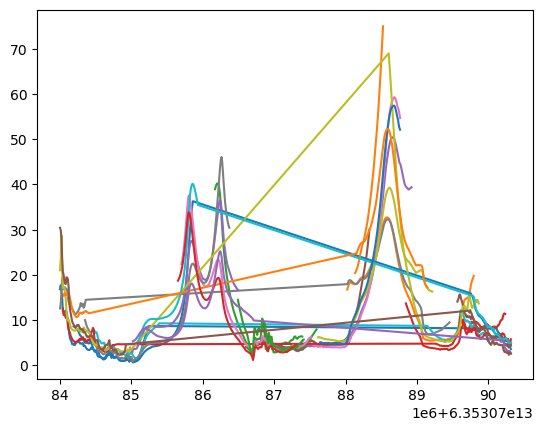

In [53]:
for prn in np.unique(selsd.PRN):
    
    seld2 = selsd.where(selsd.PRN==prn, drop=True)
    
    plt.plot(seld2.Timestamp, seld2.Absolute_STEC)#, c = selsd.PRN/30)

# plt.colorbar()

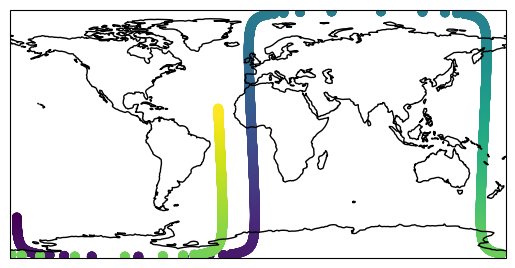

In [69]:
ax = plt.subplot(projection=ccrs.PlateCarree())


ma = 5000

ax.scatter(data.Longitude.values[:ma], data.Latitude.values[:ma], c=data.Timestamp.values[:ma])

ax.coastlines()
